# Predict House Pricing
* Predict house price using regression

<img src="images/home-prices.jpg">

## Dataset - House Sales in King County, USA
* **source:** https://www.kaggle.com/harlfoxem/housesalesprediction
* This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
* It's a great dataset for evaluating simple regression models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_df = pd.read_csv("datasets/kc_house_data.csv")

house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10351,7767400060,20141119T000000,465000.0,4,2.50,2300,7314,1.0,0,0,...,8,1420,880,1979,0,98133,47.7671,-122.330,2010,7314
8686,6837820330,20150429T000000,300000.0,4,2.50,2450,8932,2.0,0,0,...,8,2450,0,1990,0,98023,47.3093,-122.345,2410,8775
12556,2473450870,20141006T000000,325000.0,3,2.25,2480,8755,2.0,0,0,...,8,2480,0,1979,0,98058,47.4543,-122.125,2280,9940
2614,7525300310,20140619T000000,580000.0,4,2.25,2160,9593,1.0,0,0,...,8,2160,0,1969,0,98008,47.5883,-122.112,2820,9628
6518,3885806565,20150130T000000,1339000.0,4,3.50,2980,6349,2.0,0,3,...,9,2980,0,1998,0,98033,47.6819,-122.208,2870,6349


In [4]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
house_df.shape

(21613, 21)

In [6]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# Missing value control
missing_val_count_by_column = (house_df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [8]:
# Missing value control
house_df.isnull().values.any()

False

In [9]:
# Drop unnecessary columns
house_df.drop(["id","date"], axis=1, inplace=True)

In [10]:
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


In [12]:
house_df.drop(["zipcode"], axis=1, inplace=True)

In [13]:
house_df_corr = house_df.corr()
house_df_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248


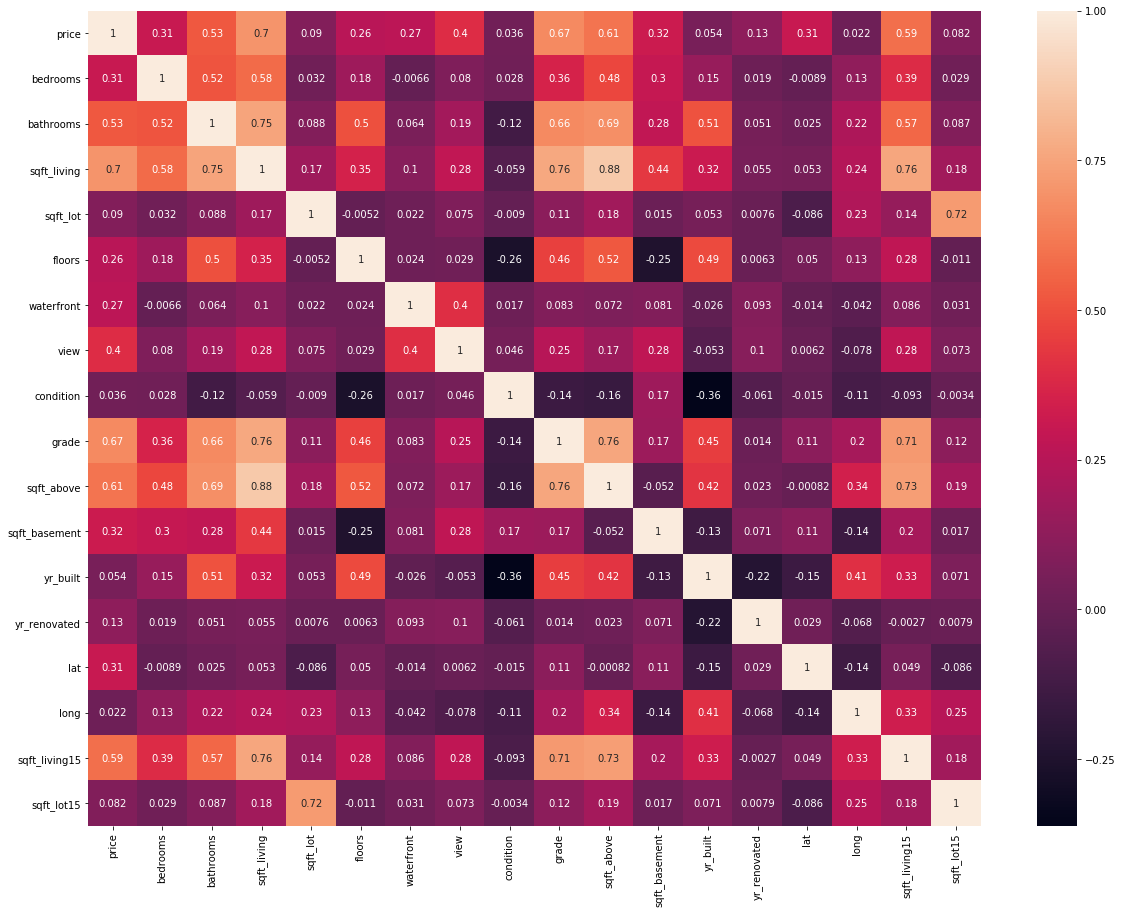

In [14]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(house_df_corr, annot=True)

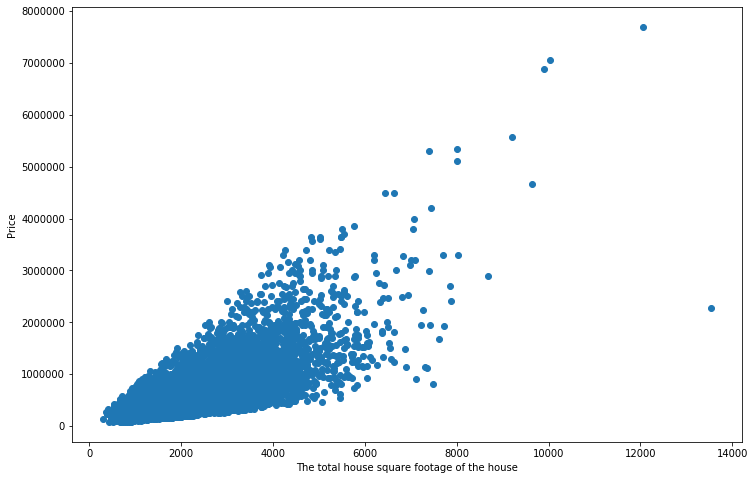

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(house_df['sqft_living'], house_df['price'])

plt.xlabel('The total house square footage of the house')
plt.ylabel('Price')
plt.show()

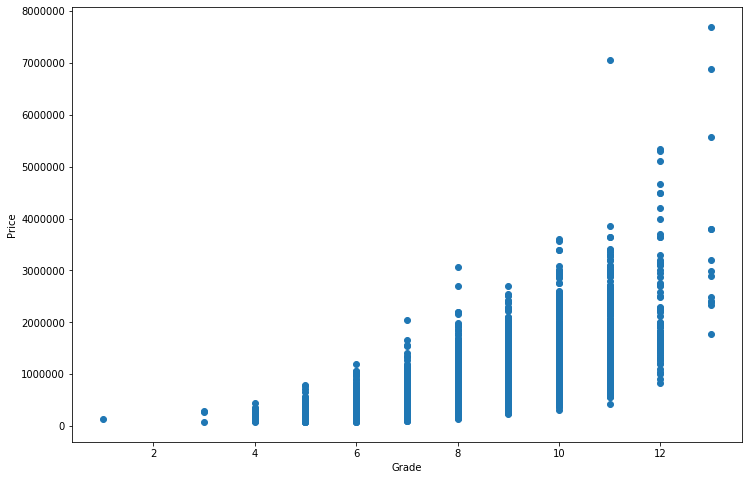

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(house_df['grade'], house_df['price'])

plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

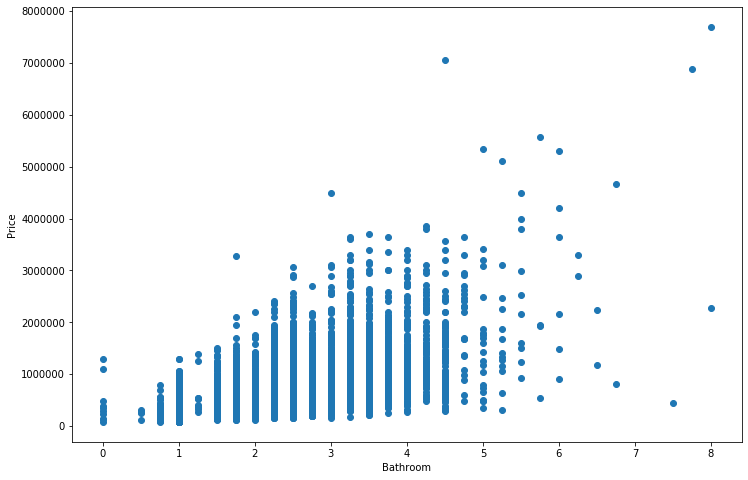

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(house_df['bathrooms'], house_df['price'])

plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.show()

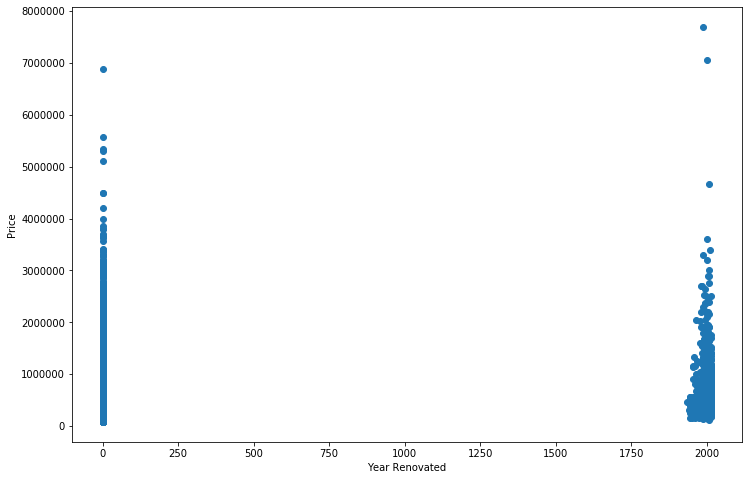

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(house_df['yr_renovated'], house_df['price'])

plt.xlabel('Year Renovated')
plt.ylabel('Price')
plt.show()

In [19]:
house_df["yr_built"]

0        1955
1        1951
2        1933
3        1965
4        1987
5        2001
6        1995
7        1963
8        1960
9        2003
10       1965
11       1942
12       1927
13       1977
14       1900
15       1979
16       1994
17       1916
18       1921
19       1969
20       1947
21       1968
22       1995
23       1985
24       1985
25       1941
26       1915
27       1909
28       1948
29       2005
         ... 
21583    1943
21584    2007
21585    2009
21586    2009
21587    2006
21588    2007
21589    2010
21590    2007
21591    2014
21592    2008
21593    2006
21594    2008
21595    2006
21596    2014
21597    2007
21598    2014
21599    2003
21600    2008
21601    2008
21602    2014
21603    2003
21604    2014
21605    2014
21606    2009
21607    2008
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21613, dtype: int64

In [20]:
import datetime

house_df['house_age'] = datetime.datetime.now().year - pd.to_numeric(house_df['yr_built'])

In [21]:
house_df["house_age"]

0         66
1         70
2         88
3         56
4         34
5         20
6         26
7         58
8         61
9         18
10        56
11        79
12        94
13        44
14       121
15        42
16        27
17       105
18       100
19        52
20        74
21        53
22        26
23        36
24        36
25        80
26       106
27       112
28        73
29        16
        ... 
21583     78
21584     14
21585     12
21586     12
21587     15
21588     14
21589     11
21590     14
21591      7
21592     13
21593     15
21594     13
21595     15
21596      7
21597     14
21598      7
21599     18
21600     13
21601     13
21602      7
21603     18
21604      7
21605      7
21606     12
21607     13
21608     12
21609      7
21610     12
21611     17
21612     13
Name: house_age, Length: 21613, dtype: int64

In [22]:
house_df.drop(['yr_built'], axis=1, inplace=True)

In [23]:
house_df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_age
11648,250000.0,2,1.00,1420,21158,1.0,0,0,3,7,1420,0,0,47.4594,-122.359,1220,8625,68
21521,1378000.0,5,3.50,5150,12230,2.0,0,2,3,10,3700,1450,0,47.6249,-122.090,2940,13462,14
8296,340000.0,4,2.50,3020,8750,1.0,0,0,3,8,1710,1310,0,47.4298,-122.290,1900,8750,61
13594,294350.0,3,1.00,1410,5120,1.5,0,0,3,6,1210,200,0,47.5238,-122.355,1330,5120,96
2069,437000.0,3,2.25,1130,1221,2.0,0,0,3,8,1030,100,0,47.6799,-122.375,1300,5000,17


In [24]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'house_age'],
      dtype='object')

In [25]:
house_df["yr_renovated"]

0           0
1        1991
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
         ... 
21583       0
21584       0
21585       0
21586       0
21587       0
21588       0
21589       0
21590       0
21591       0
21592       0
21593       0
21594       0
21595       0
21596       0
21597       0
21598       0
21599       0
21600       0
21601       0
21602       0
21603       0
21604       0
21605       0
21606       0
21607       0
21608       0
21609       0
21610       0
21611       0
21612       0
Name: yr_renovated, Length: 21613, dtype: int64

In [26]:
house_df.drop(['yr_renovated'], axis=1, inplace=True)

In [27]:
house_df = house_df.sample(frac=1).reset_index(drop=True) #veri setini shuffle etti(karıştırdı)

house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age
0,449950.0,3,1.75,1470,7590,1.0,0,0,3,7,1470,0,47.6964,-122.362,1700,5080,33
1,652000.0,3,2.00,1700,4080,1.0,0,0,4,7,850,850,47.6785,-122.393,1480,5100,80
2,279950.0,3,1.75,1660,8303,1.0,0,0,3,7,1380,280,47.4366,-122.171,1740,8320,47
3,305000.0,2,1.00,1210,7140,1.5,0,0,3,6,1210,0,47.7225,-122.349,1150,7376,100
4,495000.0,3,1.50,1580,1228,3.0,0,0,3,8,1580,0,47.6765,-122.320,1580,3605,7


In [28]:
house_df.shape

(21613, 17)

In [29]:
from sklearn import preprocessing

house_df[['sqft_living']] = preprocessing.scale(house_df[['sqft_living']].astype('float64'))
house_df[['sqft_lot']] = preprocessing.scale(house_df[['sqft_lot']].astype('float64'))
house_df[['sqft_above']] = preprocessing.scale(house_df[['sqft_above']].astype('float64'))
house_df[['sqft_basement']] = preprocessing.scale(house_df[['sqft_basement']].astype('float64'))
house_df[['sqft_lot15']] = preprocessing.scale(house_df[['sqft_lot15']].astype('float64'))
house_df[['sqft_living15']] = preprocessing.scale(house_df[['sqft_living15']].astype('float64'))


In [30]:
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age
0,449950.0,3,1.75,-0.664075,-0.181484,1.0,0,0,3,7,-0.384496,-0.658681,47.6964,-122.362,-0.418096,-0.281592,33
1,652000.0,3,2.00,-0.413645,-0.266226,1.0,0,0,4,7,-1.133224,1.261942,47.6785,-122.393,-0.739088,-0.280859,80
2,279950.0,3,1.75,-0.457198,-0.164269,1.0,0,0,3,7,-0.493183,-0.026005,47.4366,-122.171,-0.359733,-0.162926,47
3,305000.0,2,1.00,-0.947170,-0.192348,1.5,0,0,3,6,-0.698479,-0.658681,47.7225,-122.349,-1.220576,-0.197500,100
4,495000.0,3,1.50,-0.544304,-0.335083,3.0,0,0,3,8,-0.251658,-0.658681,47.6765,-122.320,-0.593182,-0.335614,7


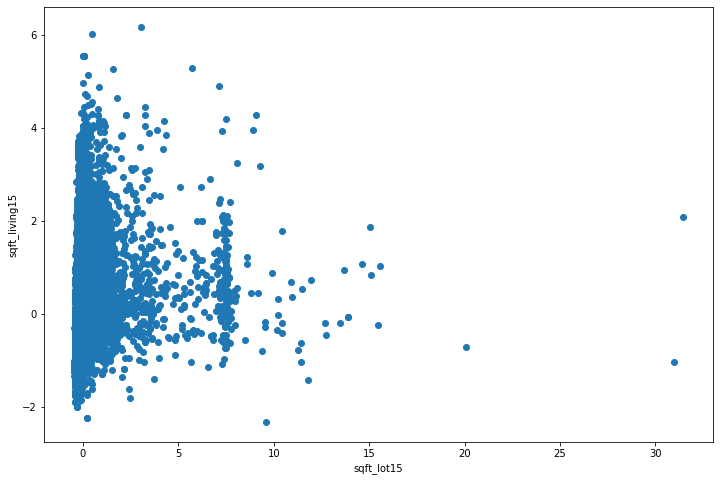

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(house_df['sqft_lot15'], house_df['sqft_living15'])

plt.xlabel('sqft_lot15')
plt.ylabel('sqft_living15')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

X = house_df.drop("price", axis = 1)
y = house_df["price"]

In [33]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age
0,3,1.75,-0.664075,-0.181484,1.0,0,0,3,7,-0.384496,-0.658681,47.6964,-122.362,-0.418096,-0.281592,33
1,3,2.00,-0.413645,-0.266226,1.0,0,0,4,7,-1.133224,1.261942,47.6785,-122.393,-0.739088,-0.280859,80
2,3,1.75,-0.457198,-0.164269,1.0,0,0,3,7,-0.493183,-0.026005,47.4366,-122.171,-0.359733,-0.162926,47
3,2,1.00,-0.947170,-0.192348,1.5,0,0,3,6,-0.698479,-0.658681,47.7225,-122.349,-1.220576,-0.197500,100
4,3,1.50,-0.544304,-0.335083,3.0,0,0,3,8,-0.251658,-0.658681,47.6765,-122.320,-0.593182,-0.335614,7


In [34]:
y.head()

0    449950.0
1    652000.0
2    279950.0
3    305000.0
4    495000.0
Name: price, dtype: float64

In [35]:
print(X.shape)
print(y.shape)

(21613, 16)
(21613,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=28)

In [37]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train, y_train)

In [38]:
y_pred = linear_model.predict(X_test)


In [39]:
training_score = linear_model.score(X_train, y_train)
test_score = linear_model.score(X_test, y_test)
print("training score: ", training_score)
print("test score: ", test_score)

training score:  0.6963851420203404
test score:  0.6878974397624392


In [40]:
from sklearn.metrics import r2_score

print('test score: ', r2_score(y_test, y_pred))

test score:  0.6878974397624392


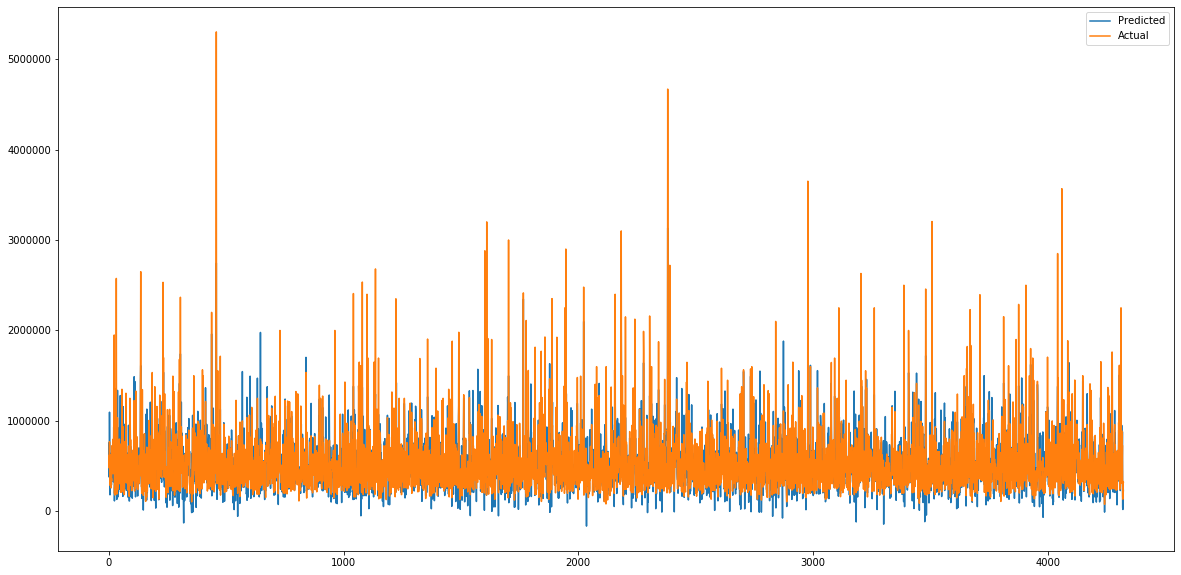

In [41]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')


plt.legend()
plt.show()

In [42]:
linear_model.coef_

array([-3.64797386e+04,  4.59763777e+04,  8.45581340e+04,  5.55386674e+03,
       -2.68637684e+01,  5.85787274e+05,  4.97880070e+04,  2.96504078e+04,
        9.54595139e+04,  7.86377806e+04,  2.83396275e+04,  5.62617410e+05,
       -1.21532919e+05,  1.30919904e+04, -1.01984581e+04,  2.52419016e+03])

In [43]:
linear_model.intercept_

-42019465.95460613

In [44]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [45]:
result_dict = {}

In [46]:
def build_model(regression_fn,                
                name_of_y_col, 
                names_of_x_cols, 
                dataset, 
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    if preprocess_fn is not None:
        X = preprocess_fn(X)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training_score : " , model.score(x_train, y_train))
    print("Test_score : ", r2_score(y_test, y_pred))

    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)

        plt.legend()
        plt.show()

    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend(['Predicted line','Observed data'])
        plt.show()
    
    return {
            'training_score': model.score(x_train, y_train),
            'test_score': r2_score(y_test, y_pred)
           }    

In [47]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        print()

In [48]:
def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

In [49]:
names_of_x_cols = ["bedrooms", "bathrooms", "sqft_living",
                   "sqft_lot", "floors", "waterfront", "view",
                   "condition", "grade", "sqft_above", "sqft_basement",
                   "lat", "long", "sqft_living15", "sqft_lot15", "house_age"]
names_of_y_cols = ["price"]

C:\Users\alper\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19835021764527.0, tolerance: 223588141530.94156
  positive)


Training_score :  0.6985263232927745
Test_score :  0.6814688713511703


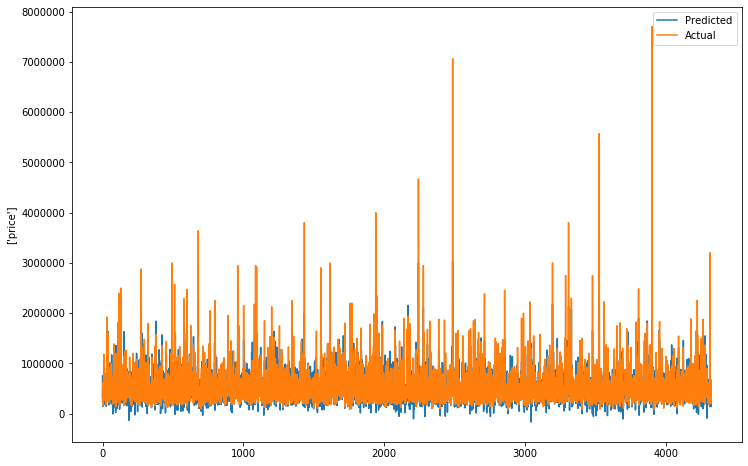

In [50]:
result_dict['lasso'] = build_model(lasso_reg,
                                   names_of_y_cols,
                                   names_of_x_cols,
                                   house_df,
                                   show_plot_Y=True)

In [51]:
compare_results()

Regression:  lasso
Training score 0.6985263232927745
Test score 0.6814688713511703



In [52]:
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5, 
                    normalize=False, max_iter=100000, warm_start=True, equivalent_to="Elastic Net"):

    print("Equivalent to:", equivalent_to)
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, 
                       normalize=normalize, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)

    return model

Equivalent to: OLS


C:\Users\alper\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\alper\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\alper\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359162445982973.1, tolerance: 234616527207.2709
  positive)


Training_score :  0.693830225638173
Test_score :  0.6989630378692522


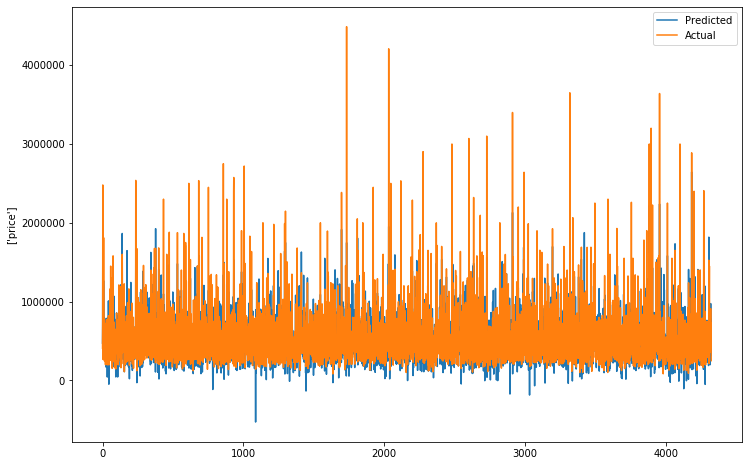

In [53]:
from functools import partial

## This generates a warning which says will not converge
result_dict['elastic_net_ols'] = build_model(partial(elastic_net_reg, 
                                                     alpha=0, equivalent_to="OLS"),
                                             names_of_y_cols,
                                             names_of_x_cols,
                                             house_df,
                                             show_plot_Y=True)

Equivalent to: Lasso


C:\Users\alper\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613718769509958.9, tolerance: 235583838224.9559
  positive)


Training_score :  0.5901557196161724
Test_score :  0.5882023167883194


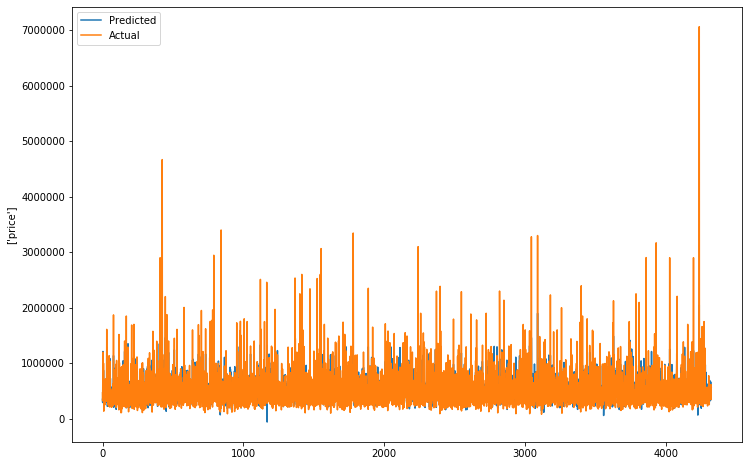

In [54]:
result_dict['elastic_net_lasso'] = build_model(partial(elastic_net_reg, alpha=1, 
                                                                    l1_ratio=0, equivalent_to="Lasso"),
                                                                  names_of_y_cols,
                                                                  names_of_x_cols,
                                                                  house_df,
                                                                  show_plot_Y=True)

Equivalent to: Ridge
Training_score :  0.7026309186312032
Test_score :  0.6660500904821665


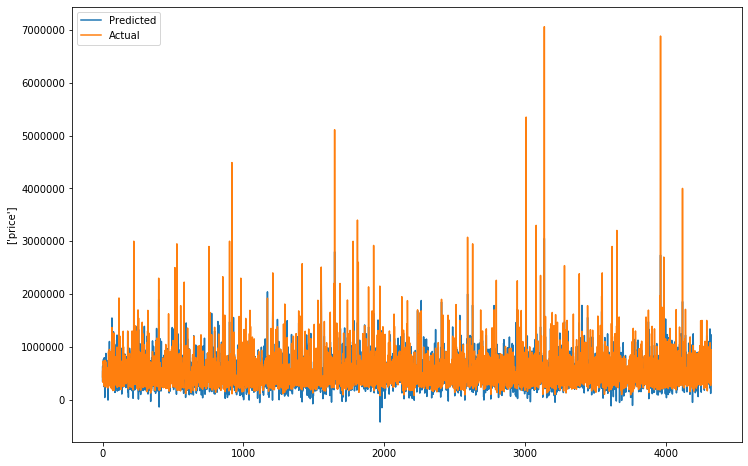

In [55]:
result_dict['elastic_net_ridge'] = build_model(partial(elastic_net_reg, alpha=1, 
                                                                    l1_ratio=1, equivalent_to="Ridge"),
                                                                  names_of_y_cols,
                                                                  names_of_x_cols,
                                                                  house_df,
                                                                  show_plot_Y=True)

Equivalent to: Elastic Net
Training_score :  0.6203946238877933
Test_score :  0.6096015958317098


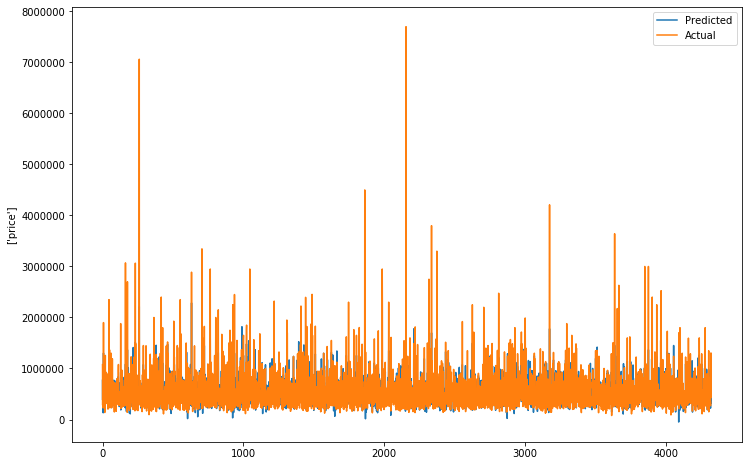

In [56]:
result_dict['elastic_net'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=0.5),
                                                            names_of_y_cols,
                                                            names_of_x_cols,
                                                            house_df,
                                                            show_plot_Y=True)

In [57]:
compare_results()

Regression:  lasso
Training score 0.6985263232927745
Test score 0.6814688713511703

Regression:  elastic_net_ols
Training score 0.693830225638173
Test score 0.6989630378692522

Regression:  elastic_net_lasso
Training score 0.5901557196161724
Test score 0.5882023167883194

Regression:  elastic_net_ridge
Training score 0.7026309186312032
Test score 0.6660500904821665

Regression:  elastic_net
Training score 0.6203946238877933
Test score 0.6096015958317098



In [62]:
def kneighbors_reg(x_train, y_train, n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.725297609535241
Test_score :  0.6207446971178698


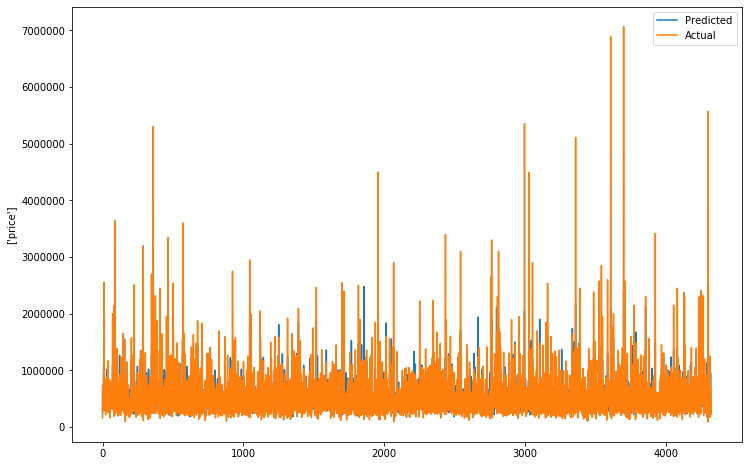

In [66]:
result_dict['kneighbors'] = build_model(kneighbors_reg,
                                                           names_of_y_cols,
                                                           names_of_x_cols,
                                                           house_df,
                                                           show_plot_Y=True)

In [64]:
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)  

    return scaler.transform(x)

In [65]:
def sgd_reg(x_train, y_train, max_iter=10000, tol=1e-3):
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    
    return model

C:\Users\alper\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training_score :  0.6950855612023408
Test_score :  0.679736984978667


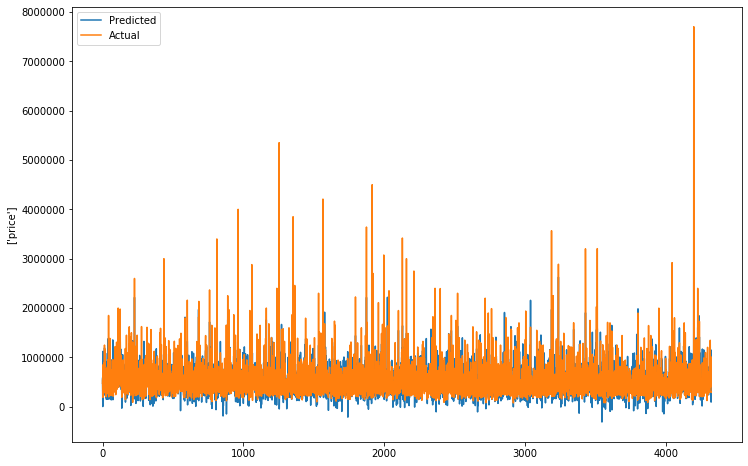

In [68]:
result_dict['sgd'] = build_model(sgd_reg,
                                                    names_of_y_cols,
                                                    names_of_x_cols,
                                                    house_df,
                                                    show_plot_Y=True,
                                                    preprocess_fn=apply_standard_scaler)

In [69]:
def decision_tree_reg(x_train, y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.4960675093288202
Test_score :  0.5136324960368759


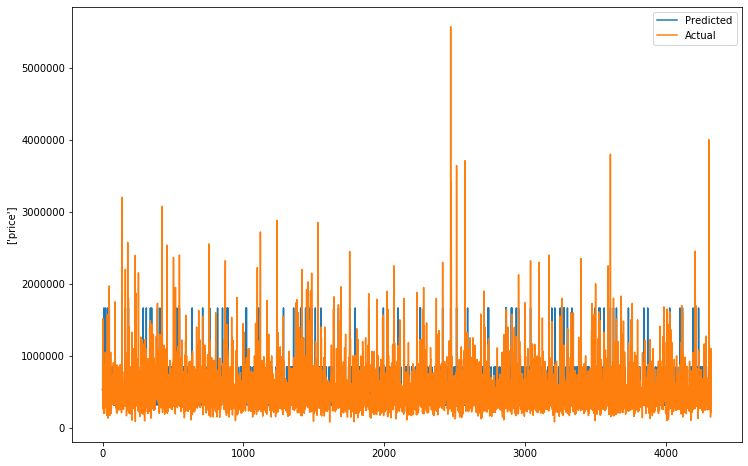

In [70]:
result_dict['decision_tree'] = build_model(decision_tree_reg,
                                                              names_of_y_cols,
                                                              names_of_x_cols,
                                                              house_df,
                                                              show_plot_Y=True)

In [71]:
compare_results()

Regression:  lasso
Training score 0.6985263232927745
Test score 0.6814688713511703

Regression:  elastic_net_ols
Training score 0.693830225638173
Test score 0.6989630378692522

Regression:  elastic_net_lasso
Training score 0.5901557196161724
Test score 0.5882023167883194

Regression:  elastic_net_ridge
Training score 0.7026309186312032
Test score 0.6660500904821665

Regression:  elastic_net
Training score 0.6203946238877933
Test score 0.6096015958317098

Regression:  svr
Training score -0.008808616240383094
Test score -0.006689411933632039

Regression:  mpg ~ kitchen_sink_kneighbors
Training score 0.7201318919861317
Test score 0.6848611149481315

Regression:  kneighbors
Training score 0.725297609535241
Test score 0.6207446971178698

Regression:  sgd
Training score 0.6950855612023408
Test score 0.679736984978667

Regression:  decision_tree
Training score 0.4960675093288202
Test score 0.5136324960368759



In [72]:
def lars_reg(x_train, y_train, n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.5278322308833722
Test_score :  0.5371114180653855


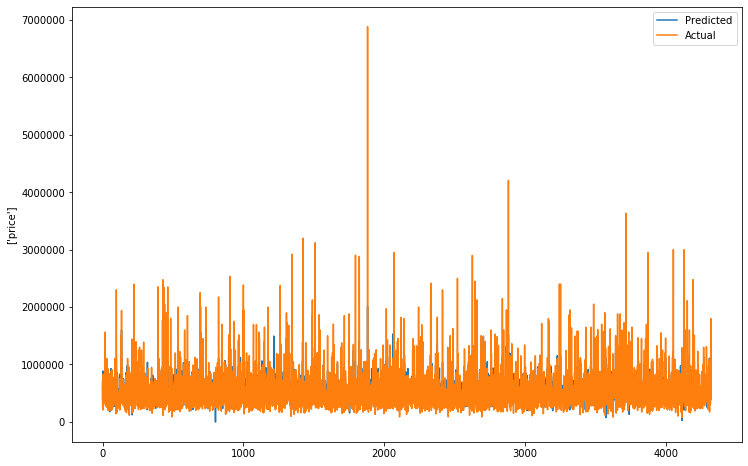

In [73]:
result_dict['lars'] = build_model(lars_reg,
                                  names_of_y_cols,
                                  names_of_x_cols, 
                                  house_df,
                                  show_plot_Y=True)

In [75]:
compare_results()

Regression:  lasso
Training score 0.6985263232927745
Test score 0.6814688713511703

Regression:  elastic_net_ols
Training score 0.693830225638173
Test score 0.6989630378692522

Regression:  elastic_net_lasso
Training score 0.5901557196161724
Test score 0.5882023167883194

Regression:  elastic_net_ridge
Training score 0.7026309186312032
Test score 0.6660500904821665

Regression:  elastic_net
Training score 0.6203946238877933
Test score 0.6096015958317098

Regression:  svr
Training score -0.008808616240383094
Test score -0.006689411933632039

Regression:  mpg ~ kitchen_sink_kneighbors
Training score 0.7201318919861317
Test score 0.6848611149481315

Regression:  kneighbors
Training score 0.725297609535241
Test score 0.6207446971178698

Regression:  sgd
Training score 0.6950855612023408
Test score 0.679736984978667

Regression:  decision_tree
Training score 0.4960675093288202
Test score 0.5136324960368759

Regression:  lars
Training score 0.5278322308833722
Test score 0.5371114180653855



In [76]:
from sklearn.model_selection import train_test_split

X = house_df.drop("price", axis = 1)
y = house_df["price"]

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

parameters = {'alpha': [0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]}

grid_search = GridSearchCV(Lasso(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'alpha': 0.2}

In [82]:
for i in range(len(parameters['alpha'])):
    print('Parameters: ', grid_search.cv_results_['params'][i])

    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'alpha': 0.2}
Mean Test Score:  0.6940038055760219
Rank:  1
Parameters:  {'alpha': 0.4}
Mean Test Score:  0.694003760891906
Rank:  2
Parameters:  {'alpha': 0.6}
Mean Test Score:  0.6940037160043382
Rank:  3
Parameters:  {'alpha': 0.7}
Mean Test Score:  0.6940036934842599
Rank:  4
Parameters:  {'alpha': 0.8}
Mean Test Score:  0.6940036709133185
Rank:  5
Parameters:  {'alpha': 0.9}
Mean Test Score:  0.6940036482915141
Rank:  6
Parameters:  {'alpha': 1.0}
Mean Test Score:  0.6940036256188471
Rank:  7


In [83]:
lasso_model = Lasso(alpha=grid_search.best_params_['alpha']).fit(x_train, y_train)

In [84]:
y_pred = lasso_model.predict(x_test)

print('Training score: ', lasso_model.score(x_train, y_train))
print('Test score: ', r2_score(y_test, y_pred))

Training score:  0.6955092389779441
Test score:  0.6921166469040291


In [85]:
parameters = {'n_neighbors': [10, 12, 14, 18, 20, 25, 30, 35, 50]}

grid_search = GridSearchCV(KNeighborsRegressor(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'n_neighbors': 10}

In [86]:
for i in range(len(parameters['n_neighbors'])):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'n_neighbors': 10}
Mean Test Score:  0.6394104316919947
Rank:  1
Parameters:  {'n_neighbors': 12}
Mean Test Score:  0.636229279629725
Rank:  2
Parameters:  {'n_neighbors': 14}
Mean Test Score:  0.632641140718764
Rank:  3
Parameters:  {'n_neighbors': 18}
Mean Test Score:  0.6215808475029346
Rank:  4
Parameters:  {'n_neighbors': 20}
Mean Test Score:  0.6170080738500304
Rank:  5
Parameters:  {'n_neighbors': 25}
Mean Test Score:  0.6067715795692242
Rank:  6
Parameters:  {'n_neighbors': 30}
Mean Test Score:  0.5962992749276339
Rank:  7
Parameters:  {'n_neighbors': 35}
Mean Test Score:  0.5856680986458508
Rank:  8
Parameters:  {'n_neighbors': 50}
Mean Test Score:  0.5597567341719161
Rank:  9


In [87]:
kneighbors_model = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors']).fit(x_train, y_train)

In [88]:
y_pred = kneighbors_model.predict(x_test)

print('Training score: ', kneighbors_model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.7220350444086566
Testing score:  0.675396653038342


In [89]:
parameters = {'max_depth':[1, 2, 3, 4, 5, 7, 8, 9, 10]}

grid_search = GridSearchCV(DecisionTreeRegressor(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 9}

In [90]:
decision_tree_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth']).fit(x_train, y_train)

In [91]:
y_pred = decision_tree_model.predict(x_test)

print('Training score: ', decision_tree_model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.8874088470058047
Testing score:  0.8007310727994058


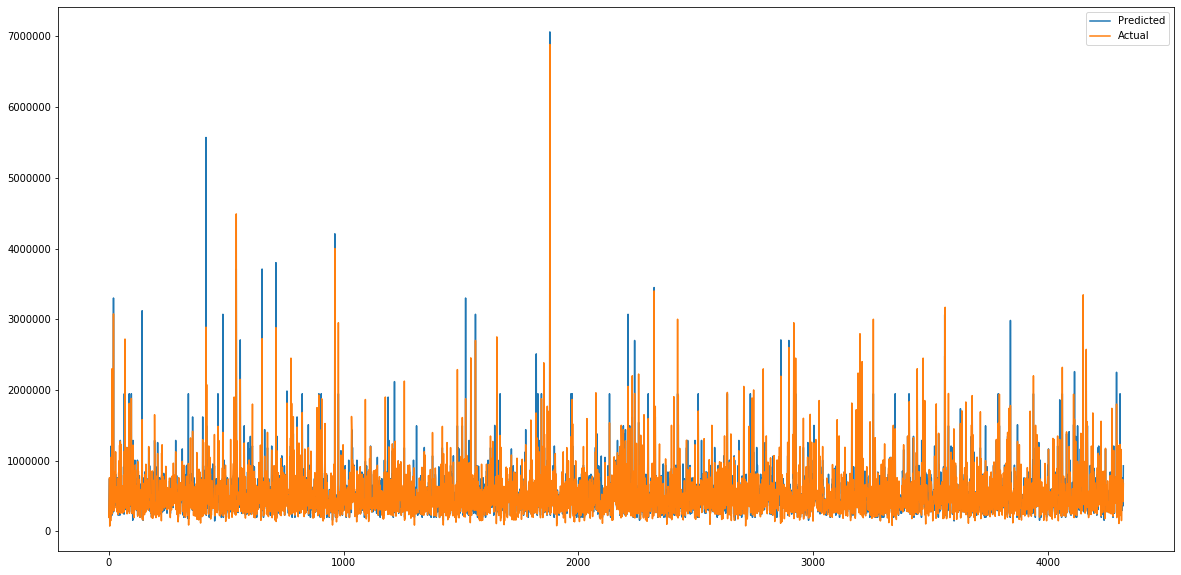

In [92]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')


plt.legend()
plt.show()

In [93]:
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

baseline = GradientBoostingRegressor(max_depth=3, n_estimators=50)
baseline.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [94]:
y_pred = baseline.predict(x_test)

r2_score(y_test, y_pred)

0.8443625910594909

In [95]:
important_features = pd.Series(baseline.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

grade            0.319996
sqft_living      0.312940
lat              0.156964
long             0.060176
waterfront       0.045779
house_age        0.032141
sqft_living15    0.027295
view             0.023610
sqft_above       0.009078
bathrooms        0.006977
condition        0.002181
sqft_lot         0.001232
sqft_lot15       0.001121
sqft_basement    0.000509
floors           0.000000
bedrooms         0.000000
dtype: float64

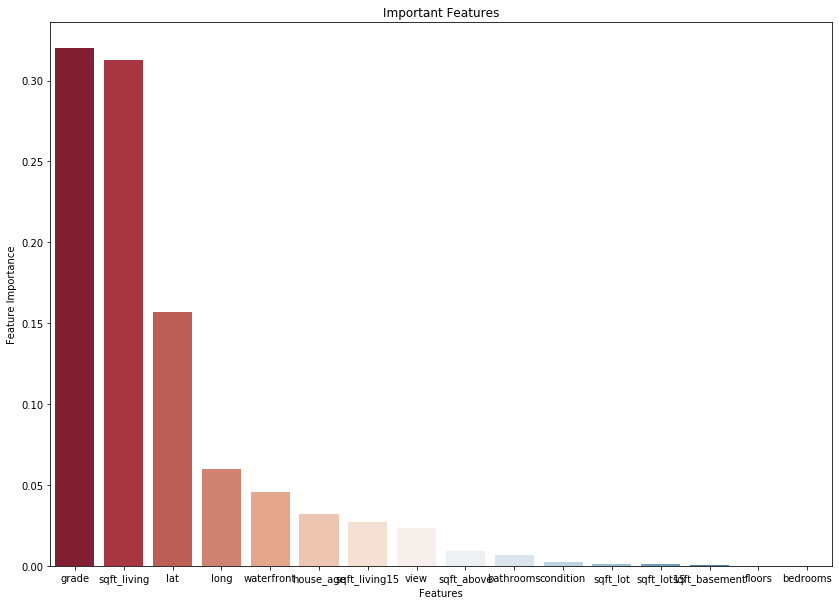

In [97]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.barplot( x = important_features.index, y = important_features, palette = "RdBu")

plt.xlabel('Features')
plt.ylabel('Feature Importance')

plt.title("Important Features")
plt.show()

In [98]:
gbr = GradientBoostingRegressor(max_depth=3)

In [99]:
parameters = {'n_estimators': [1, 5, 10, 50, 100, 200, 300, 400, 500]}

gridsearch_reg = GridSearchCV(estimator=gbr, param_grid=parameters, cv=3)

In [100]:
gridsearch_reg.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [101]:
gridsearch_reg.best_params_

{'n_estimators': 500}

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [104]:
gbr = GradientBoostingRegressor(max_depth=3, 
                                n_estimators = gridsearch_reg.best_params_['n_estimators'])

gbr.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [105]:
y_pred = gbr.predict(x_test)

r2_score(y_test, y_pred)

0.8959814053896104

In [106]:
gbr2 = GradientBoostingRegressor(max_depth=3, warm_start=True)

In [107]:
min_val_error = float("inf")
error_increasing = 0

for n_estimators in range(1, 1000):
    gbr2.n_estimators = n_estimators
    gbr2.fit(x_train, y_train)
    
    y_pred = gbr2.predict(x_test)
    val_error = mean_squared_error(y_test, y_pred)
    
    print('No. of estimators: ', gbr2.n_estimators_)
    print('Validation error: ', val_error)
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_increasing = 0
    else:
        error_increasing += 1
        if error_increasing == 10:
            break

No. of estimators:  1
Validation error:  114727214320.69228
No. of estimators:  2
Validation error:  103299096889.0062
No. of estimators:  3
Validation error:  93606200100.47638
No. of estimators:  4
Validation error:  84695197829.13614
No. of estimators:  5
Validation error:  76741574576.03906
No. of estimators:  6
Validation error:  70250420792.29024
No. of estimators:  7
Validation error:  64453748931.17115
No. of estimators:  8
Validation error:  60581394241.13953
No. of estimators:  9
Validation error:  56330189036.548386
No. of estimators:  10
Validation error:  52899499184.00135
No. of estimators:  11
Validation error:  50531797711.95272
No. of estimators:  12
Validation error:  48206113792.243324
No. of estimators:  13
Validation error:  45925510931.85641
No. of estimators:  14
Validation error:  43428737782.88149
No. of estimators:  15
Validation error:  41029972322.17008
No. of estimators:  16
Validation error:  39037421403.77329
No. of estimators:  17
Validation error:  3781

No. of estimators:  137
Validation error:  16287897051.495699
No. of estimators:  138
Validation error:  16274120120.27442
No. of estimators:  139
Validation error:  16268930211.301527
No. of estimators:  140
Validation error:  16255822683.241253
No. of estimators:  141
Validation error:  16207867624.26646
No. of estimators:  142
Validation error:  16203573187.32307
No. of estimators:  143
Validation error:  16192075205.236729
No. of estimators:  144
Validation error:  16187427594.044935
No. of estimators:  145
Validation error:  16187699508.82429
No. of estimators:  146
Validation error:  16188071251.864489
No. of estimators:  147
Validation error:  16168004494.485958
No. of estimators:  148
Validation error:  16128505096.317965
No. of estimators:  149
Validation error:  16110097032.336462
No. of estimators:  150
Validation error:  16096537665.064533
No. of estimators:  151
Validation error:  16082148498.0487
No. of estimators:  152
Validation error:  16065502461.65917
No. of estimato

No. of estimators:  270
Validation error:  14658369345.640137
No. of estimators:  271
Validation error:  14633577814.170555
No. of estimators:  272
Validation error:  14630357147.87548
No. of estimators:  273
Validation error:  14592202743.537186
No. of estimators:  274
Validation error:  14587707286.44243
No. of estimators:  275
Validation error:  14569358390.933344
No. of estimators:  276
Validation error:  14554265066.37408
No. of estimators:  277
Validation error:  14544659821.256262
No. of estimators:  278
Validation error:  14541844250.73577
No. of estimators:  279
Validation error:  14537397171.914845
No. of estimators:  280
Validation error:  14520955552.250126
No. of estimators:  281
Validation error:  14516054380.531418
No. of estimators:  282
Validation error:  14513773520.682085
No. of estimators:  283
Validation error:  14518074985.263975
No. of estimators:  284
Validation error:  14518225482.117868
No. of estimators:  285
Validation error:  14513224979.174164
No. of estim

No. of estimators:  404
Validation error:  13964212981.42004
No. of estimators:  405
Validation error:  13957393565.73723
No. of estimators:  406
Validation error:  13941898955.194967
No. of estimators:  407
Validation error:  13937753557.486256
No. of estimators:  408
Validation error:  13932618744.378643
No. of estimators:  409
Validation error:  13926336917.570847
No. of estimators:  410
Validation error:  13918115943.970455
No. of estimators:  411
Validation error:  13907158304.953798
No. of estimators:  412
Validation error:  13871553316.695433
No. of estimators:  413
Validation error:  13868347065.496069
No. of estimators:  414
Validation error:  13878936587.09503
No. of estimators:  415
Validation error:  13876423208.482685
No. of estimators:  416
Validation error:  13871340956.918962
No. of estimators:  417
Validation error:  13859607522.500328
No. of estimators:  418
Validation error:  13859762232.116524
No. of estimators:  419
Validation error:  13862978377.90055
No. of estim

No. of estimators:  537
Validation error:  13337395115.747742
No. of estimators:  538
Validation error:  13320995208.1586
No. of estimators:  539
Validation error:  13305247582.489687
No. of estimators:  540
Validation error:  13296790424.29862
No. of estimators:  541
Validation error:  13293666160.599669
No. of estimators:  542
Validation error:  13295184155.167917
No. of estimators:  543
Validation error:  13298557047.749466
No. of estimators:  544
Validation error:  13297832903.989141
No. of estimators:  545
Validation error:  13288028770.193972
No. of estimators:  546
Validation error:  13286528669.707949
No. of estimators:  547
Validation error:  13285416628.243332
No. of estimators:  548
Validation error:  13283490634.874914
No. of estimators:  549
Validation error:  13274786871.161024
No. of estimators:  550
Validation error:  13277816356.416239
No. of estimators:  551
Validation error:  13270346502.413568
No. of estimators:  552
Validation error:  13258764615.619133
No. of esti

No. of estimators:  670
Validation error:  13000663657.450075
No. of estimators:  671
Validation error:  12999723090.602045
No. of estimators:  672
Validation error:  13002111432.553734
No. of estimators:  673
Validation error:  12998336343.20892
No. of estimators:  674
Validation error:  12997373228.943878
No. of estimators:  675
Validation error:  12997358970.56389
No. of estimators:  676
Validation error:  12996031940.990715


In [108]:
n_estimators

676

In [109]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
gbr_best = GradientBoostingRegressor(max_depth=3,
                                     n_estimators = n_estimators)

In [111]:
gbr_best.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=676,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [112]:
y_pred = gbr_best.predict(x_test)

r2_score(y_test, y_pred)

0.8816441304807044

In [114]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [115]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators=600, max_leaf_nodes=12, n_jobs=-1)

rnd_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=12,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [116]:
y_pred = rnd_reg.predict(x_test)

r2_score(y_test, y_pred)

0.748756752000358

In [117]:
important_features = pd.Series(rnd_reg.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

grade            0.436813
sqft_living      0.307064
lat              0.151415
long             0.058653
waterfront       0.014265
house_age        0.012290
sqft_above       0.011251
view             0.002450
sqft_living15    0.002367
bathrooms        0.001995
sqft_lot         0.000573
sqft_lot15       0.000433
sqft_basement    0.000353
bedrooms         0.000054
floors           0.000022
condition        0.000000
dtype: float64

In [118]:
from sklearn.ensemble import ExtraTreesRegressor 

In [119]:
extra_reg = ExtraTreesRegressor(n_estimators=600, max_leaf_nodes=12, n_jobs=-1)

extra_reg.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=12,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [120]:
y_pred = extra_reg.predict(x_test)

r2_score(y_test, y_pred)

0.7163408288865578

In [121]:
important_features = pd.Series(extra_reg.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

grade            0.301744
sqft_living      0.259805
sqft_living15    0.101512
lat              0.096651
sqft_above       0.087404
waterfront       0.049111
view             0.039373
bathrooms        0.038306
long             0.013659
house_age        0.008306
sqft_basement    0.003323
floors           0.000322
bedrooms         0.000263
sqft_lot         0.000129
sqft_lot15       0.000050
condition        0.000042
dtype: float64

In [128]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)